# Importo drive


In [ ]:
# from google.colab import drive
# drive.mount('/content/gdrive')

Mounted at /content/gdrive


# <img src="https://github.com/JuliaLang/julia-logo-graphics/raw/master/images/julia-logo-color.png" height="100" /> _Colab Notebook Template_

## Instructions
1. Work on a copy of this notebook: _File_ > _Save a copy in Drive_ (you will need a Google account). Alternatively, you can download the notebook using _File_ > _Download .ipynb_, then upload it to [Colab](https://colab.research.google.com/).
2. If you need a GPU: _Runtime_ > _Change runtime type_ > _Harware accelerator_ = _GPU_.
3. Execute the following cell (click on it and press Ctrl+Enter) to install Julia, IJulia and other packages (if needed, update `JULIA_VERSION` and the other parameters). This takes a couple of minutes.
4. Reload this page (press Ctrl+R, or ⌘+R, or the F5 key) and continue to the next section.

_Notes_:
* If your Colab Runtime gets reset (e.g., due to inactivity), repeat steps 2, 3 and 4.
* After installation, if you want to change the Julia version or activate/deactivate the GPU, you will need to reset the Runtime: _Runtime_ > _Factory reset runtime_ and repeat steps 3 and 4.

In [ ]:
#=
%%shell
set -e

#---------------------------------------------------#
JULIA_VERSION="1.10.3" # any version ≥ 0.7.0
JULIA_PACKAGES="IJulia BenchmarkTools"
JULIA_PACKAGES_IF_GPU="CUDA" # or CuArrays for older Julia versions
JULIA_NUM_THREADS=2
#---------------------------------------------------#

if [ -z `which julia` ]; then
  # Install Julia
  JULIA_VER=`cut -d '.' -f -2 <<< "$JULIA_VERSION"`
  echo "Installing Julia $JULIA_VERSION on the current Colab Runtime..."
  BASE_URL="https://julialang-s3.julialang.org/bin/linux/x64"
  URL="$BASE_URL/$JULIA_VER/julia-$JULIA_VERSION-linux-x86_64.tar.gz"
  wget -nv $URL -O /tmp/julia.tar.gz # -nv means "not verbose"
  tar -x -f /tmp/julia.tar.gz -C /usr/local --strip-components 1
  rm /tmp/julia.tar.gz

  # Install Packages
  nvidia-smi -L &> /dev/null && export GPU=1 || export GPU=0
  if [ $GPU -eq 1 ]; then
    JULIA_PACKAGES="$JULIA_PACKAGES $JULIA_PACKAGES_IF_GPU"
  fi
  for PKG in `echo $JULIA_PACKAGES`; do
    echo "Installing Julia package $PKG..."
    julia -e 'using Pkg; pkg"add '$PKG'; precompile;"' &> /dev/null
  done

  # Install kernel and rename it to "julia"
  echo "Installing IJulia kernel..."
  julia -e 'using IJulia; IJulia.installkernel("julia", env=Dict(
      "JULIA_NUM_THREADS"=>"'"$JULIA_NUM_THREADS"'"))'
  KERNEL_DIR=`julia -e "using IJulia; print(IJulia.kerneldir())"`
  KERNEL_NAME=`ls -d "$KERNEL_DIR"/julia*`
  mv -f $KERNEL_NAME "$KERNEL_DIR"/julia

  echo ''
  echo "Successfully installed `julia -v`!"
  echo "Please reload this page (press Ctrl+R, ⌘+R, or the F5 key) then"
  echo "jump to the 'Checking the Installation' section."
fi
=#

Installing Julia 1.10.3 on the current Colab Runtime...
2024-06-30 17:27:30 URL:https://storage.googleapis.com/julialang2/bin/linux/x64/1.10/julia-1.10.3-linux-x86_64.tar.gz [173495204/173495204] -> "/tmp/julia.tar.gz" [1]
Installing Julia package IJulia...
Installing Julia package BenchmarkTools...
Installing IJulia kernel...
[ Info: Installing julia kernelspec in /root/.local/share/jupyter/kernels/julia-1.10

Please reload this page (press Ctrl+R, ⌘+R, or the F5 key) then
jump to the 'Checking the Installation' section.


# Checking the Installation
The `versioninfo()` function should print your Julia version and some other info about the system:

In [1]:
# versioninfo() #recargar pestaña para que funcione

Julia Version 1.10.3
Commit 0b4590a5507 (2024-04-30 10:59 UTC)
Build Info:
  Official https://julialang.org/ release
Platform Info:
  OS: Linux (x86_64-linux-gnu)
  CPU: 2 × Intel(R) Xeon(R) CPU @ 2.20GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-15.0.7 (ORCJIT, broadwell)
Threads: 2 default, 0 interactive, 1 GC (on 2 virtual cores)
Environment:
  LD_LIBRARY_PATH = /usr/local/nvidia/lib:/usr/local/nvidia/lib64
  JULIA_NUM_THREADS = 2


# Instalación de paquetes a utilizar

In [2]:
using Pkg

In [3]:
Pkg.add("DataFrames")
Pkg.add("DataFramesMeta")
Pkg.add("CSV")
Pkg.add("GR")
Pkg.add("Plots")
Pkg.add("Dates")
Pkg.add("Statistics")
Pkg.add("StatsBase")

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
   Installed SentinelArrays ────────────── v1.4.3
   Installed Crayons ───────────────────── v4.1.1
   Installed PooledArrays ──────────────── v1.4.3
   Installed Tables ────────────────────── v1.11.1
   Installed PrettyTables ──────────────── v2.3.2
   Installed IteratorInterfaceExtensions ─ v1.0.0
   Installed DataValueInterfaces ───────── v1.0.0
   Installed LaTeXStrings ──────────────── v1.3.1
   Installed DataAPI ───────────────────── v1.16.0
   Installed OrderedCollections ────────── v1.6.3
   Installed InlineStrings ─────────────── v1.4.1
   Installed TableTraits ───────────────── v1.0.1
   Installed InvertedIndices ───────────── v1.3.0
   Installed Reexport ──────────────────── v1.2.2
   Installed Compat ────────────────────── v4.15.0
   Installed Missings ──────────────────── v1.2.0
   Installed StringManipulation ────────── v0.3.4
   Installed SortingAlgorithms ─────────── v1.2.1
   I

In [4]:
using DataFrames
using DataFramesMeta
using CSV
using Plots
using Dates
using Statistics
using GR
using StatsBase

# Procesamiento data y plots


In [5]:
movies_csv = "/content/gdrive/MyDrive/tdl/tp_data.csv" #utilizar el path donde se tenga guardado el csv localmente

"/content/gdrive/MyDrive/tdl/tp_data.csv"

In [6]:
movies = DataFrame(CSV.read(movies_csv, DataFrame))

Row,imdbId,type,year,duration,genres,rating,votes,reviews,directors,cast,country,releaseDate,keywords,companies
,String15,String15,Int64?,Float64?,String?,Float64,Float64,Float64?,String?,String?,String?,Date?,String?,String?
1,tt0001082,movie,1909,missing,missing,5.0,2.0,missing,missing,missing,MX,1909-01-01,missing,missing
2,tt0002665,movie,1913,7.0,['Comedy'],5.0,1.0,missing,['Max Urban'],"['Tadeusz Dura', 'Marie Šlechtová', 'Adolf Krössing', 'Emil Pollert', 'Emil Burian', 'Věra Pivoňková', 'Karel Hruška', 'Ema Miřiovská', 'Gabriela Horvátová', 'Otakar Chmel']",missing,1913-10-03,"['opera', 'lost film']",['ASUM']
3,tt0033581,movie,1941,18.0,missing,0.0,0.0,missing,missing,missing,missing,1941-02-14,missing,missing
4,tt0062431,movie,1967,missing,['Drama'],0.0,0.0,missing,['Jiří Vanýsek'],"['Josef Šebek', 'Jana Tomečková', 'Josef Kemr', 'Arna Mohelská', 'Vlasta Peterková', 'Jaroslav Kaňkovský', 'Libuše Geprtová', 'Marie Pavlíková', 'Tomáš Čisárik', 'Jiří Dušek', 'Karel Kabíček', 'Luboš Vraspír', 'Miroslav Donutil', 'Vladimír Plšek', 'Blažena Rýznarová', 'Karel Mišurec', 'Arnošt Parsch', 'Jaroslav Rosendorf']",XC,1972-09-04,['based on short story'],['Československá televize Brno']
5,tt0075835,movie,1977,missing,missing,5.0,1.0,missing,missing,missing,MX,1977-01-01,missing,missing
6,tt0078803,movie,1979,missing,missing,5.0,2.0,missing,missing,missing,MX,1979-01-01,missing,missing
7,tt0090174,movie,1985,missing,['Documentary'],0.0,0.0,missing,['Vincent Monnikendam'],missing,NL,1985-01-01,['migrant worker'],missing
8,tt0100733,movie,1990,10.0,missing,0.0,0.0,missing,['Franz Leopold Schmelzer'],['Rainer Doppler'],AT,1990-12-16,missing,"['Hochschule für Musik und darstellende Kunst, Wien']"
9,tt0104324,movie,1992,12.0,missing,9.5,1.0,missing,"['Norbert Trummer', 'Martin Kaltner', 'Thomas Baumann']","['Norbert Trummer', 'Martin Kaltner']",AT,1992-01-01,missing,missing


In [7]:
unique!(movies); #filtra rows repetidas (in-place)
movies = unique(movies, :imdbId); # filtra ids repetidos (no inplace)

Identificamos que hay ratings 0.0 de peliculas con 0 votos, cosa que no tiene sentido. Los consideramos data erronea y los eliminamos.

In [8]:
filter(row -> row.votes <= 0, movies)

Row,imdbId,type,year,duration,genres,rating,votes,reviews,directors,cast,country,releaseDate,keywords,companies
,String15,String15,Int64?,Float64?,String?,Float64,Float64,Float64?,String?,String?,String?,Date?,String?,String?
1,tt0033581,movie,1941,18.0,missing,0.0,0.0,missing,missing,missing,missing,1941-02-14,missing,missing
2,tt0062431,movie,1967,missing,['Drama'],0.0,0.0,missing,['Jiří Vanýsek'],"['Josef Šebek', 'Jana Tomečková', 'Josef Kemr', 'Arna Mohelská', 'Vlasta Peterková', 'Jaroslav Kaňkovský', 'Libuše Geprtová', 'Marie Pavlíková', 'Tomáš Čisárik', 'Jiří Dušek', 'Karel Kabíček', 'Luboš Vraspír', 'Miroslav Donutil', 'Vladimír Plšek', 'Blažena Rýznarová', 'Karel Mišurec', 'Arnošt Parsch', 'Jaroslav Rosendorf']",XC,1972-09-04,['based on short story'],['Československá televize Brno']
3,tt0090174,movie,1985,missing,['Documentary'],0.0,0.0,missing,['Vincent Monnikendam'],missing,NL,1985-01-01,['migrant worker'],missing
4,tt0100733,movie,1990,10.0,missing,0.0,0.0,missing,['Franz Leopold Schmelzer'],['Rainer Doppler'],AT,1990-12-16,missing,"['Hochschule für Musik und darstellende Kunst, Wien']"
5,tt0105732,movie,1992,45.0,['Documentary'],0.0,0.0,missing,['Franz Leopold Schmelzer'],"['Robert Hauer-Riedl', 'Ulrike Benko']",missing,1992-01-01,missing,"['Hochschule für Musik und darstellende Kunst, Wien']"
6,tt0108280,movie,1993,missing,['Documentary'],0.0,0.0,missing,['Leopold Lummerstorfer'],missing,AT,1993-01-01,missing,['Filmlokomotive']
7,tt0111805,movie,1994,90.0,"['Drama', 'Documentary']",0.0,0.0,missing,['Tin Chun'],"['Ying Siu-Liu', 'Wai Ka-Ming', 'Poon Ting', 'Chui Bo-Lun']",missing,1993-05-08,missing,missing
8,tt0122086,movie,1987,missing,missing,0.0,0.0,missing,missing,missing,missing,1987-01-01,missing,missing
9,tt0122122,movie,1986,91.0,['Horror'],0.0,0.0,missing,['Wang Chungkuang'],"['Terry Hu', 'Shih Feng', 'Tian Ping-Chun', 'Hsiang Mei-Lung']",TW,1981-07-11,missing,missing


In [9]:
filter!(row -> row.votes > 0, movies)

Row,imdbId,type,year,duration,genres,rating,votes,reviews,directors,cast,country,releaseDate,keywords,companies
,String15,String15,Int64?,Float64?,String?,Float64,Float64,Float64?,String?,String?,String?,Date?,String?,String?
1,tt0001082,movie,1909,missing,missing,5.0,2.0,missing,missing,missing,MX,1909-01-01,missing,missing
2,tt0002665,movie,1913,7.0,['Comedy'],5.0,1.0,missing,['Max Urban'],"['Tadeusz Dura', 'Marie Šlechtová', 'Adolf Krössing', 'Emil Pollert', 'Emil Burian', 'Věra Pivoňková', 'Karel Hruška', 'Ema Miřiovská', 'Gabriela Horvátová', 'Otakar Chmel']",missing,1913-10-03,"['opera', 'lost film']",['ASUM']
3,tt0075835,movie,1977,missing,missing,5.0,1.0,missing,missing,missing,MX,1977-01-01,missing,missing
4,tt0078803,movie,1979,missing,missing,5.0,2.0,missing,missing,missing,MX,1979-01-01,missing,missing
5,tt0104324,movie,1992,12.0,missing,9.5,1.0,missing,"['Norbert Trummer', 'Martin Kaltner', 'Thomas Baumann']","['Norbert Trummer', 'Martin Kaltner']",AT,1992-01-01,missing,missing
6,tt0136493,movie,1987,missing,missing,5.0,2.0,missing,missing,missing,MX,1987-01-01,missing,missing
7,tt0178572,movie,1950,missing,missing,5.0,2.0,missing,missing,missing,MX,1950-12-31,missing,missing
8,tt0201640,movie,1925,missing,missing,8.0,1.0,missing,['Ricardo Villarán'],missing,AR,1925-01-01,missing,missing
9,tt0253295,movie,1965,missing,missing,5.0,2.0,missing,missing,missing,MX,1965-01-01,['silent cinema'],missing


In [10]:
dropmissing!(movies, [:rating]); # (! --> inplace)

In [11]:
movies[0.0 .> movies.rating .> 10.0, :] #los ratings son válidos

Row,imdbId,type,year,duration,genres,rating,votes,reviews,directors,cast,country,releaseDate,keywords,companies
,String15,String15,Int64?,Float64?,String?,Float64,Float64,Float64?,String?,String?,String?,Date?,String?,String?


Descartamos columna que no consideramos que pueda ser útil para la predicción

Tenemos una columna con las fechas de estreno, las transformaremos en año de estreno (las fechas missing pasarán a tener releaseYear 0)

In [12]:
movies.releaseDate .= coalesce.(movies.releaseDate, Date(0)) #cambio missings por fecha 00-00-0000
movies.releaseYear = year.(movies.releaseDate) #nueva columna releaseYear a partir de releaseDate
movies = select(movies, Not(:releaseDate)) #borramos la columna releaseDate
movies.year = coalesce.(movies.year, 0); #reempllazamos missings por 0 en columna year, ahora year y releaseYear deberian coincidir

In [13]:
filter(row -> row.year != row.releaseYear, movies)

Row,imdbId,type,year,duration,genres,rating,votes,reviews,directors,cast,country,keywords,companies,releaseYear
,String15,String15,Int64,Float64?,String?,Float64,Float64,Float64?,String?,String?,String?,String?,String?,Int64
1,tt0322322,movie,1972,8.0,['Documentary'],5.0,2.0,missing,"['Daniela Alatorre', 'Alexandra Délano']",missing,MX,"['covid-19', 'short film']",missing,2020
2,tt10192300,movie,0,90.0,missing,3.0,1.0,missing,['Lam Tze-chung'],"['Ryan Zheng Kai', 'Kitty Zhang', 'Raquel Xu', 'Alex Fong Lik-Sun', 'Lam Tze-chung', 'Danny Chan Kwok-kwan', 'Wong Jing', 'Michelle Hu', 'Tian Leixi', 'Cheung Tat-Ming']",CN,missing,['Hengye Pictures'],2019
3,tt13236150,movie,2020,98.0,"['Documentary', 'Music']",7.5,1.0,missing,"['Filipp Grigoryan', 'Tatyana Gulina']",['Alla Pugacheva'],RU,missing,missing,2019
4,tt28752516,movie,0,100.0,['Comedy'],1.5,2.0,-1.31,['Shadi Ali'],"['Ayten Amer', 'Ahmed Fathi', 'Mahmoud Hafez', 'Sherry Adel', 'Salah Abdallah', 'Aaidah Riyadh', 'Ismail Farghaly', 'Mohamed Radwan', 'Soliman Eid', 'Tarek El Ebiary']",missing,missing,missing,2023
5,tt32131329,tvSpecial,2018,50.0,"['Documentary', 'TV Movie']",8.0,1.0,0.21,"['Bertie Gregory', 'Steve Winter']",['Edward Marcoux'],GB,missing,['National Geographic'],2017
6,tt6449622,movie,2016,81.0,['Horror'],5.3,3.0,missing,['Li Kai'],"['Lou Qi', 'Cady Yang', 'Xie Bo', 'Jin Jing', 'Du Xudong', 'Qi Qi', 'Kai Di', 'Mu Di', 'Yang Di', 'Chen Yuanyuan']",missing,missing,missing,2015
7,tt7737794,movie,0,120.0,['Documentary'],8.0,2.0,5.69,['John Maggio'],['Corey Stoll'],US,missing,['PBS American Experience'],2020
8,tt0030822,movie,1938,missing,missing,7.7,8.0,missing,missing,missing,missing,missing,missing,0
9,tt0095750,video,1988,missing,missing,6.1,9.0,missing,missing,missing,missing,missing,missing,0


Observamos que los datos no son coincidentes en MUCHAS de las películas. Tomaremos la decisión de quedarnos con el año presente en releaseYear, excepto en los casos que el dato sea 0, en donde nos quedaremos con el valor en Year. Además se dropea una de las columnas ya que no tiene sentido tener dos columnas con la misma información.


In [14]:
movies.releaseYear[movies.releaseYear .== 0] .= movies.year[movies.releaseYear .== 0];

In [15]:
filter!(row -> (row.year == row.releaseYear) || (row.year == 0), movies)

Row,imdbId,type,year,duration,genres,rating,votes,reviews,directors,cast,country,keywords,companies,releaseYear
,String15,String15,Int64,Float64?,String?,Float64,Float64,Float64?,String?,String?,String?,String?,String?,Int64
1,tt0001082,movie,1909,missing,missing,5.0,2.0,missing,missing,missing,MX,missing,missing,1909
2,tt0002665,movie,1913,7.0,['Comedy'],5.0,1.0,missing,['Max Urban'],"['Tadeusz Dura', 'Marie Šlechtová', 'Adolf Krössing', 'Emil Pollert', 'Emil Burian', 'Věra Pivoňková', 'Karel Hruška', 'Ema Miřiovská', 'Gabriela Horvátová', 'Otakar Chmel']",missing,"['opera', 'lost film']",['ASUM'],1913
3,tt0075835,movie,1977,missing,missing,5.0,1.0,missing,missing,missing,MX,missing,missing,1977
4,tt0078803,movie,1979,missing,missing,5.0,2.0,missing,missing,missing,MX,missing,missing,1979
5,tt0104324,movie,1992,12.0,missing,9.5,1.0,missing,"['Norbert Trummer', 'Martin Kaltner', 'Thomas Baumann']","['Norbert Trummer', 'Martin Kaltner']",AT,missing,missing,1992
6,tt0136493,movie,1987,missing,missing,5.0,2.0,missing,missing,missing,MX,missing,missing,1987
7,tt0178572,movie,1950,missing,missing,5.0,2.0,missing,missing,missing,MX,missing,missing,1950
8,tt0201640,movie,1925,missing,missing,8.0,1.0,missing,['Ricardo Villarán'],missing,AR,missing,missing,1925
9,tt0253295,movie,1965,missing,missing,5.0,2.0,missing,missing,missing,MX,['silent cinema'],missing,1965


In [16]:
filter(row -> (row.year != row.releaseYear) && (row.year != 0), movies)

Row,imdbId,type,year,duration,genres,rating,votes,reviews,directors,cast,country,keywords,companies,releaseYear
,String15,String15,Int64,Float64?,String?,Float64,Float64,Float64?,String?,String?,String?,String?,String?,Int64


In [17]:
select!(movies, Not(:year));

In [ ]:
function string_a_lista(s::Union{Missing, String})
    if ismissing(s)
        return missing
    end

    s = replace(s, "[" => "")
    s = replace(s, "]" => "")
    s = strip(s)

    list = split(s, ",")
    list = [strip(palabra, [' ', '\'']) for palabra in list]
    return [string.(palabra) for palabra in list]
end

string_a_lista (generic function with 1 method)

In [ ]:
function modificar_formato_columna_string_a_lista!(df::DataFrame, nombre_columna::Symbol)
    df[!, nombre_columna] = string_a_lista.(df[!, nombre_columna])
end

modificar_formato_columna_string_a_lista! (generic function with 1 method)

In [ ]:
modificar_formato_columna_string_a_lista!(movies, :directors);
modificar_formato_columna_string_a_lista!(movies, :companies);
modificar_formato_columna_string_a_lista!(movies, :cast);
modificar_formato_columna_string_a_lista!(movies, :genres);
modificar_formato_columna_string_a_lista!(movies, :keywords);
modificar_formato_columna_string_a_lista!(movies, :country);

In [ ]:
first(movies, 3)

Row,imdbId,type,duration,genres,rating,votes,reviews,directors,cast,country,keywords,companies,releaseYear
,String15,String15,Float64?,Array…?,Float64,Float64,Float64?,Array…?,Array…?,Array…?,Array…?,Array…?,Int64
1,tt0001082,movie,missing,missing,5.0,2.0,missing,missing,missing,"[""MX""]",missing,missing,1909
2,tt0002665,movie,7.0,"[""Comedy""]",5.0,1.0,missing,"[""Max Urban""]","[""Tadeusz Dura"", ""Marie Šlechtová"", ""Adolf Krössing"", ""Emil Pollert"", ""Emil Burian"", ""Věra Pivoňková"", ""Karel Hruška"", ""Ema Miřiovská"", ""Gabriela Horvátová"", ""Otakar Chmel""]",missing,"[""opera"", ""lost film""]","[""ASUM""]",1913
3,tt0075835,movie,missing,missing,5.0,1.0,missing,missing,missing,"[""MX""]",missing,missing,1977


In [ ]:
function unir_listas(lista1::Union{Vector{String}, Missing}, lista2::Union{Vector{String}, Missing})
    if ismissing(lista1) && ismissing(lista2)
        return missing
    elseif ismissing(lista1)
        return lista2
    elseif ismissing(lista2)
        return lista1
    else
        return unique(union(lista1, lista2))
    end
end

unir_listas (generic function with 1 method)

In [ ]:
unir_listas(["Max Urban", "Tadeusz Dura"], ["Tadeusz Dura", "Marie Šlechtová", "Adolf Krössing", "Emil Pollert", "Emil Burian", "Věra Pivoňková", "Karel Hruška", "Ema Miřiovská", "Gabriela Horvátová", "Otakar Chmel"])

11-element Vector{String}:
 "Max Urban"
 "Tadeusz Dura"
 "Marie Šlechtová"
 "Adolf Krössing"
 "Emil Pollert"
 "Emil Burian"
 "Věra Pivoňková"
 "Karel Hruška"
 "Ema Miřiovská"
 "Gabriela Horvátová"
 "Otakar Chmel"

In [ ]:
movies.crew = [unir_listas(row.cast, row.directors) for row in eachrow(movies)]
select!(movies, Not(:cast))
select!(movies, Not(:directors))

Row,imdbId,type,duration,genres,rating,votes,reviews,country,keywords,companies,releaseYear,crew
,String15,String15,Float64?,Array…?,Float64,Float64,Float64?,Array…?,Array…?,Array…?,Int64,Array…?
1,tt0001082,movie,missing,missing,5.0,2.0,missing,"[""MX""]",missing,missing,1909,missing
2,tt0002665,movie,7.0,"[""Comedy""]",5.0,1.0,missing,missing,"[""opera"", ""lost film""]","[""ASUM""]",1913,"[""Tadeusz Dura"", ""Marie Šlechtová"", ""Adolf Krössing"", ""Emil Pollert"", ""Emil Burian"", ""Věra Pivoňková"", ""Karel Hruška"", ""Ema Miřiovská"", ""Gabriela Horvátová"", ""Otakar Chmel"", ""Max Urban""]"
3,tt0075835,movie,missing,missing,5.0,1.0,missing,"[""MX""]",missing,missing,1977,missing
4,tt0078803,movie,missing,missing,5.0,2.0,missing,"[""MX""]",missing,missing,1979,missing
5,tt0104324,movie,12.0,missing,9.5,1.0,missing,"[""AT""]",missing,missing,1992,"[""Norbert Trummer"", ""Martin Kaltner"", ""Thomas Baumann""]"
6,tt0136493,movie,missing,missing,5.0,2.0,missing,"[""MX""]",missing,missing,1987,missing
7,tt0178572,movie,missing,missing,5.0,2.0,missing,"[""MX""]",missing,missing,1950,missing
8,tt0201640,movie,missing,missing,8.0,1.0,missing,"[""AR""]",missing,missing,1925,"[""Ricardo Villarán""]"
9,tt0253295,movie,missing,missing,5.0,2.0,missing,"[""MX""]","[""silent cinema""]",missing,1965,missing


In [ ]:
indices_ordenados = sortperm(movies.rating, rev=true)
top10_indices = indices_ordenados[1:10]
# top10_indices = first(indices_ordenados, 10) es lo mismo!
top10_movies = movies[top10_indices, :]

#top 10 de peliculas son peliculas con pocos votos, todas rating 10.0 ¿analizar con más de cierta cantidad de votos?

Row,imdbId,type,duration,genres,rating,votes,reviews,country,keywords,companies,releaseYear,crew
,String15,String15,Float64?,Array…?,Float64,Float64,Float64?,Array…?,Array…?,Array…?,Int64,Array…?
1,tt17013154,movie,45.0,"[""Animation""]",10.0,1.0,missing,"[""US""]",missing,missing,2022,"[""Kevin Chacon"", ""Alyssa Cheatham"", ""Alfred Molina"", ""Justice Quiroz"", ""Dave Droxler"", ""Hunter Jones"", ""Leslie Valdes"", ""Charles E. Bastien""]"
2,tt10413258,movie,98.0,"[""Documentary""]",10.0,2.0,missing,"[""KR""]","[""korea president""]","[""Contents Panda"", ""Jin Pictures"", ""300 & Co."", ""M&CF""]",2019,"[""Roh Moo-hyun"", ""Yoo Si-min"", ""Moon Jae-in"", ""Lee Myung-bak"", ""Kim Dae-jung"", ""Kim Young-sam"", ""Chun Doo-hwan"", ""Kim Kyeong-soo"", ""Cheon Ho-sun"", ""Kwon Yang-sook"", ""Baek Jae-ho""]"
3,tt1676744,tvEpisode,missing,missing,10.0,22.0,missing,missing,missing,missing,2004,missing
4,tt1713426,tvEpisode,missing,missing,10.0,21.0,missing,missing,missing,missing,2004,missing
5,tt1713427,tvEpisode,missing,missing,10.0,22.0,missing,missing,missing,missing,2004,missing
6,tt2904114,tvEpisode,missing,missing,10.0,22.0,missing,missing,missing,missing,2004,missing
7,tt2904120,tvEpisode,missing,missing,10.0,22.0,missing,missing,missing,missing,2004,missing
8,tt2904122,tvEpisode,missing,missing,10.0,22.0,missing,missing,missing,missing,2004,missing
9,tt2904124,tvEpisode,missing,missing,10.0,21.0,missing,missing,missing,missing,2004,missing


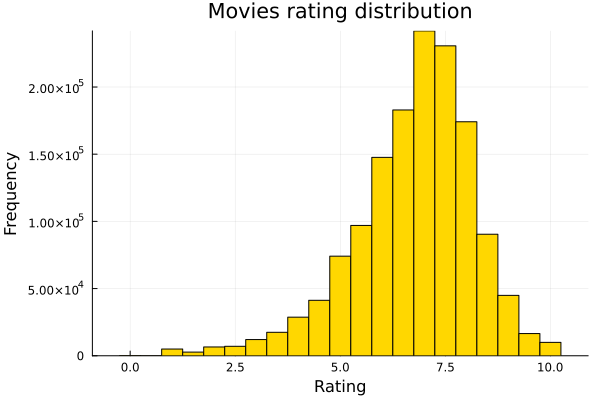

In [ ]:
hist = fit(Histogram, movies.rating, nbins=20)
bar(hist.edges[1][1:end-1], hist.weights, bar_width=hist.edges[1][2] - hist.edges[1][1],
    xlabel="Rating", ylabel="Frequency", title="Movies rating distribution", legend=false, color=:gold)

In [ ]:
movies_avg_rating_per_year = combine(groupby(movies, :releaseYear), :rating => mean => :avgRating)
movies_avg_rating_per_year = filter(row -> row.releaseYear != 0 && row.releaseYear < 2025, movies_avg_rating_per_year)

Row,releaseYear,avgRating
,Int64,Float64
1,1874,6.8
2,1878,4.80833
3,1881,5.6
4,1882,5.7
5,1883,6.2
6,1885,5.2
7,1887,4.80222
8,1888,6.12
9,1889,5.05


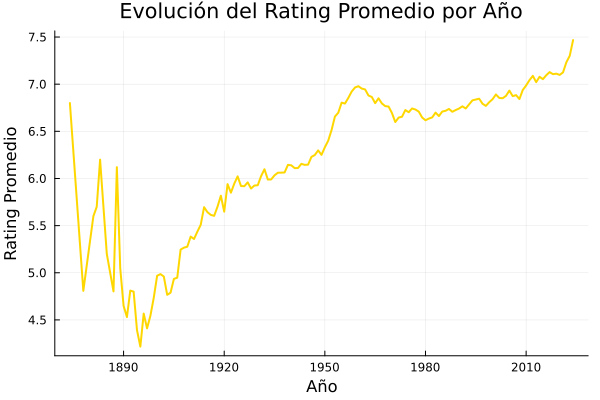

In [ ]:
p = Plots.plot(movies_avg_rating_per_year.releaseYear, movies_avg_rating_per_year.avgRating,
     xlabel="Año", ylabel="Rating Promedio", title="Evolución del Rating Promedio por Año",
     label="", linewidth=2, color=:gold)

[ Info: Saved animation to /content/average_rating_through_time.gif


Plots.AnimatedGif("/content/average_rating_through_time.gif")
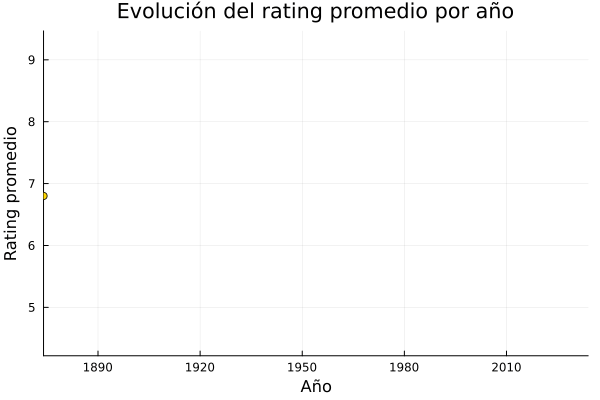

In [ ]:
p = Plots.plot([], [], xlabel="Año", ylabel="Rating promedio", title="Evolución del rating promedio por año",
         legend=false, xlims=(minimum(movies_avg_rating_per_year.releaseYear), maximum(movies_avg_rating_per_year.releaseYear) + 10), ylims=(minimum(movies_avg_rating_per_year.avgRating), maximum(movies_avg_rating_per_year.avgRating) + 2))

anim = Animation()

for row in eachrow(movies_avg_rating_per_year)
    year = row.releaseYear
    rating = row.avgRating

    scatter!([year], [rating], color=:gold)

    frame(anim)
end

gif(anim, "average_rating_through_time.gif", fps=10)

In [ ]:
function asignar_categoria_duracion(duracion::Union{Missing, Float64})
    if ismissing(duracion)
        return "missing"
    elseif duracion <= 20
        return "Very Short"
    elseif duracion <= 40
        return "Short"
    elseif duracion <= 60
        return "Medium"
    elseif duracion <= 120
        return "Long"
    else
        return "Very Long"
    end
end

asignar_categoria_duracion (generic function with 1 method)

In [ ]:
movies[!, :duration] = asignar_categoria_duracion.(movies[!, :duration])

1431281-element Vector{String}:
 "missing"
 "Very Short"
 "missing"
 "missing"
 "Very Short"
 "missing"
 "missing"
 "missing"
 "missing"
 "missing"
 "missing"
 "missing"
 "missing"
 ⋮
 "Medium"
 "Long"
 "Long"
 "Very Long"
 "Very Long"
 "Long"
 "Long"
 "Long"
 "Long"
 "Long"
 "Very Short"
 "Long"

In [ ]:
movies_avg_rating_per_length = combine(groupby(movies, :duration), :rating => mean => :avgRating)
indices_ordenes = [2, 6, 4, 3, 5]
movies_avg_rating_per_length = movies_avg_rating_per_length[indices_ordenes, :]

Row,duration,avgRating
,String,Float64
1,Very Short,6.81876
2,Short,7.26115
3,Medium,7.28296
4,Long,6.20391
5,Very Long,6.73428


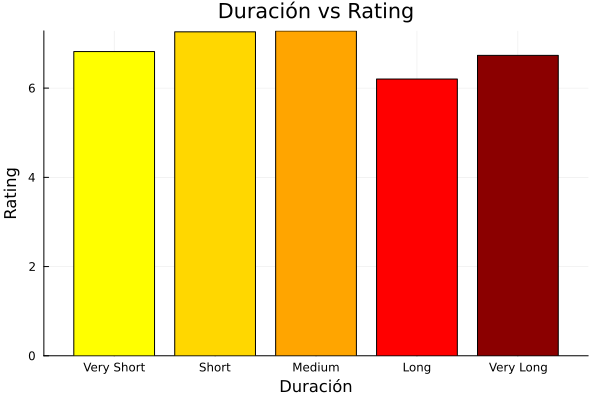

In [ ]:
colores = [:yellow, :gold, :orange, :red, :darkred]
bar(movies_avg_rating_per_length[:, :duration], movies_avg_rating_per_length[:, :avgRating],
    xlabel = "Duración",
    ylabel = "Rating",
    title = "Duración vs Rating",
    legend = false,
    bar_width = 0.8,
    color= colores
)

In [ ]:
movies_avg_rating_per_type = combine(groupby(movies, :type), :rating => mean => :avgRating)
# indices_ordenes = [2, 6, 4, 3, 5]
# movies_avg_rating_per_length = movies_avg_rating_per_length[indices_ordenes, :]

Row,type,avgRating
,String15,Float64
1,movie,6.14392
2,tvSeries,6.8496
3,tvMovie,6.59702
4,tvEpisode,7.38823
5,video,6.54423
6,tvSpecial,6.71276
7,tvMiniSeries,7.1272
8,videoGame,6.80224
9,short,6.79321


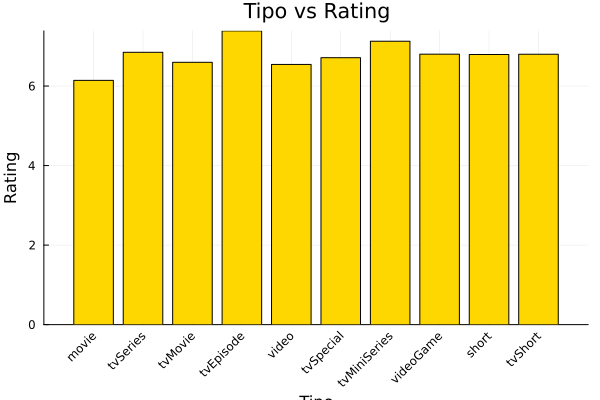

In [ ]:
bar(movies_avg_rating_per_type[:, :type], movies_avg_rating_per_type[:, :avgRating],
    xlabel = "Tipo",
    ylabel = "Rating",
    title = "Tipo vs Rating",
    legend = false,
    bar_width = 0.8,
    xrotation = 45,
    color=:gold
)